In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import permutation_test_score

In [2]:
# Load imputed data from csv file

# Data Source:
    # Dhafar Hamed Abd; Mohammed Fadhil Mahdi; Arezoo Jahani. (2025). "Rheumatic and autoimmune diseases 
    # dataset", https://doi.org/10.7910/DVN/VM4OR3, Harvard Dataverse, V3     
    
    # Mahdi, M. F., Jahani, A., & Abd, D. H. (2025). Diagnosis of rheumatic and autoimmune diseases dataset. Data in 
    # Brief, 60, 111623. https://doi.org/10.1016/j.dib.2025.111623

df = pd.read_csv("4_df_simple_imputer.csv")    
print(df.columns)
display(df)

Index(['Age', 'Gender', 'Disease', 'ESR', 'CRP', 'RF', 'Anti-CCP', 'C3', 'C4',
       'ESR_missing', 'CRP_missing', 'RF_missing', 'Anti-CCP_missing',
       'C3_missing', 'C4_missing', 'HLA-B27', 'ANA', 'Anti-Ro', 'Anti-La',
       'Anti-dsDNA', 'Anti-Sm', 'HLA-B27_missing', 'ANA_missing',
       'Anti-Ro_missing', 'Anti-La_missing', 'Anti-dsDNA_missing',
       'Anti-Sm_missing'],
      dtype='object')


,Age,Gender,Disease,ESR,CRP,RF,Anti-CCP,C3,C4,ESR_missing,...,Anti-Ro,Anti-La,Anti-dsDNA,Anti-Sm,HLA-B27_missing,ANA_missing,Anti-Ro_missing,Anti-La_missing,Anti-dsDNA_missing,Anti-Sm_missing
0,70,Male,Rheumatoid Arthritis,39.0,18.6,34.2,29.9,133.0,27.0,0.0,...,Positive,Negative,Positive,Positive,False,False,False,False,False,False
1,39,Female,Rheumatoid Arthritis,26.0,21.7,35.5,28.9,100.0,66.0,0.0,...,Positive,Positive,Positive,Positive,False,True,False,True,False,True
2,36,Female,Rheumatoid Arthritis,41.0,15.6,21.3,21.3,158.0,12.0,0.0,...,Positive,Positive,Negative,Positive,False,False,True,False,False,True
3,35,Male,Rheumatoid Arthritis,43.0,23.4,26.0,39.0,119.0,41.0,0.0,...,Positive,Positive,Positive,Positive,True,True,False,False,True,True
4,37,Female,Rheumatoid Arthritis,30.0,15.6,38.1,30.8,144.0,49.0,0.0,...,Positive,Negative,Positive,Negative,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,Male,Psoriatic Arthritis,36.0,17.0,14.5,16.1,133.0,32.0,0.0,...,Negative,Positive,Positive,Positive,False,False,False,False,False,True
12081,36,Male,Psoriatic Arthritis,43.0,15.6,17.7,13.5,133.0,41.0,0.0,...,Negative,Positive,Positive,Negative,False,False,False,False,True,False
12082,20,Female,Psoriatic Arthritis,31.0,28.8,4.8,5.8,133.0,38.0,0.0,...,Positive,Negative,Negative,Negative,False,False,False,False,False,False
12083,33,Female,Psoriatic Arthritis,36.0,15.6,19.2,9.5,96.0,52.0,0.0,...,Positive,Positive,Positive,Positive,False,False,False,False,False,True


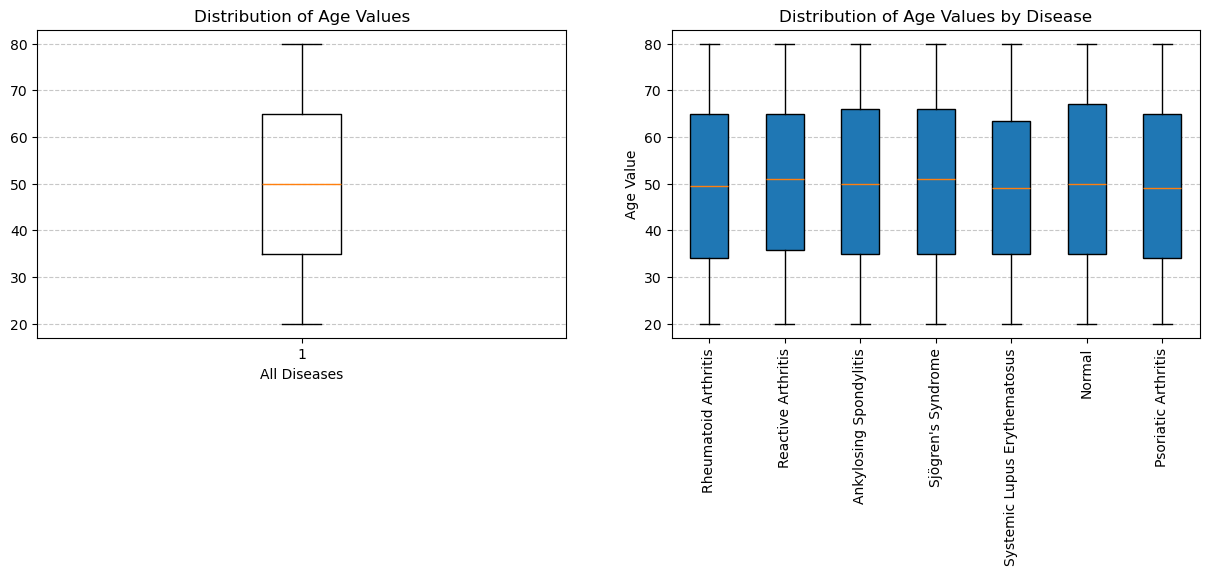

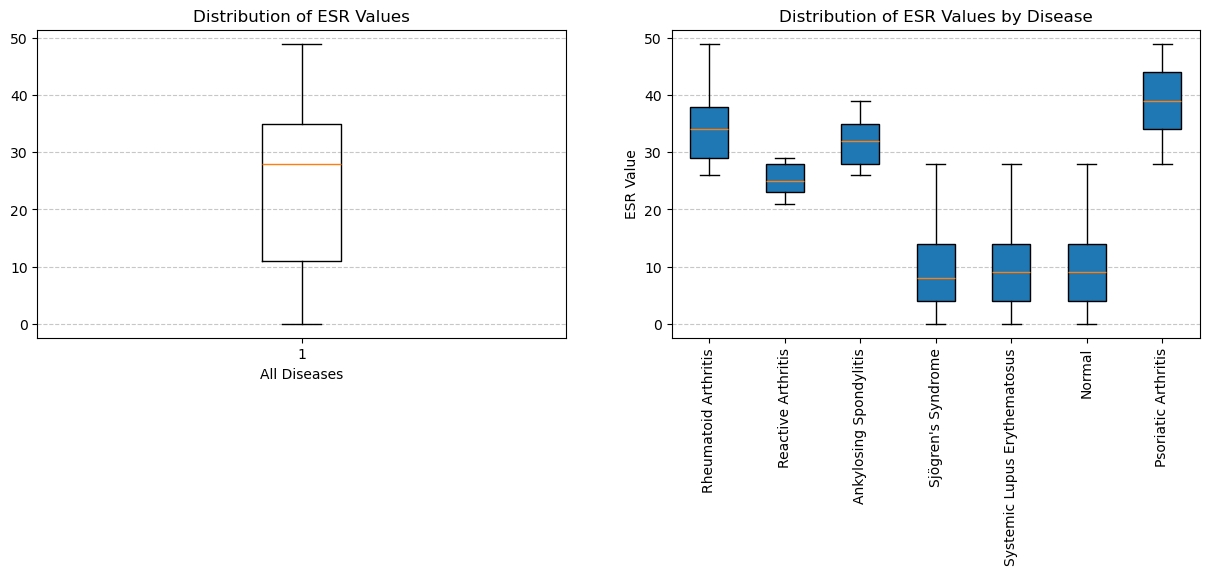

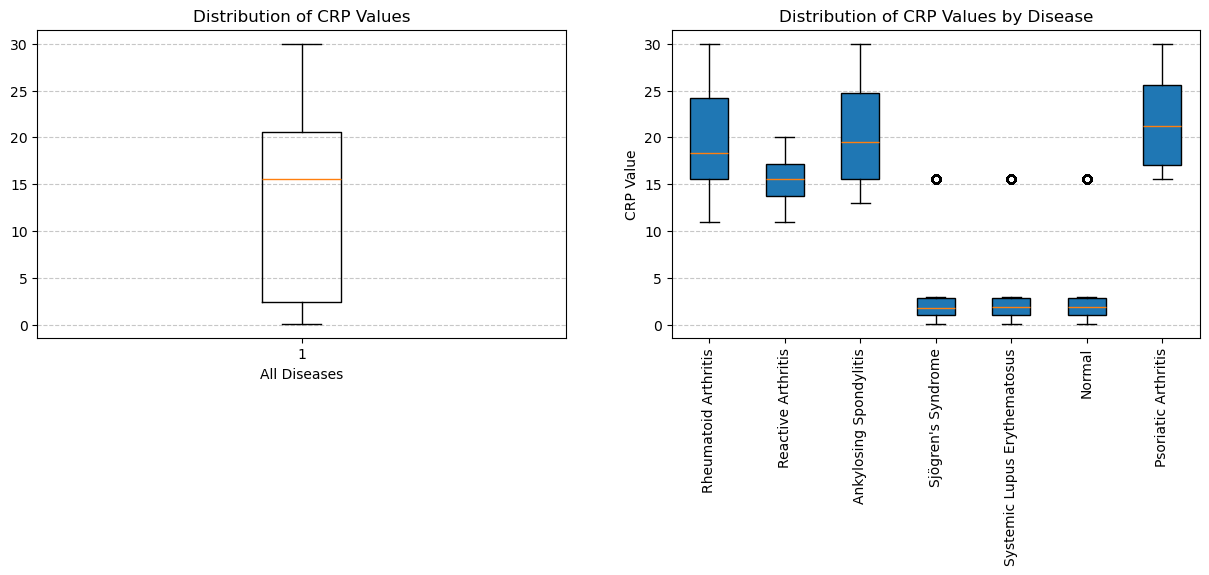

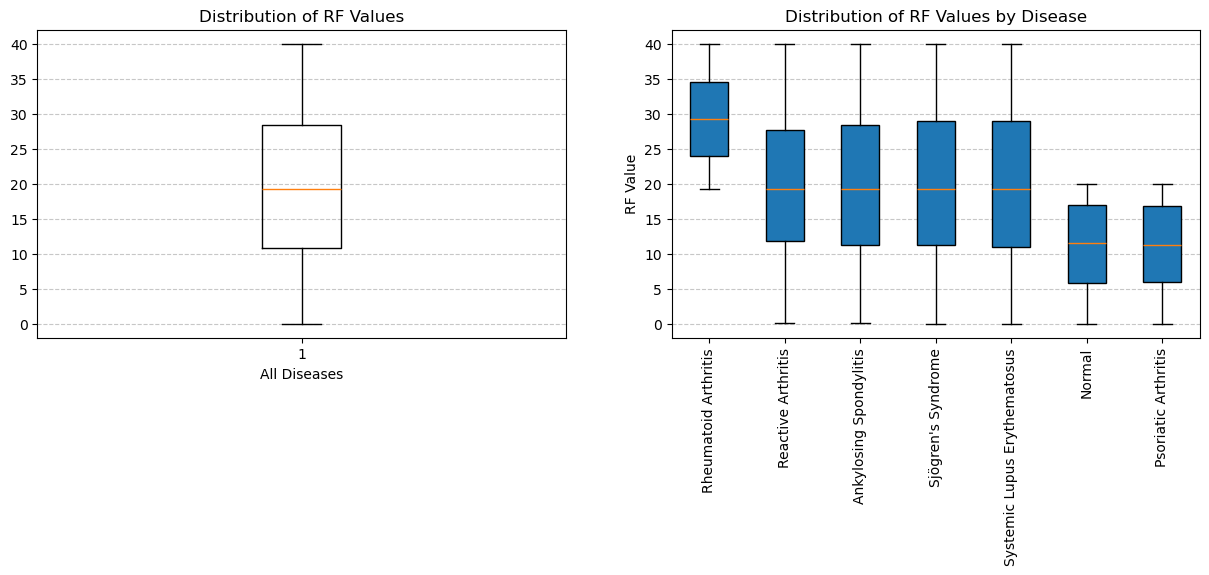

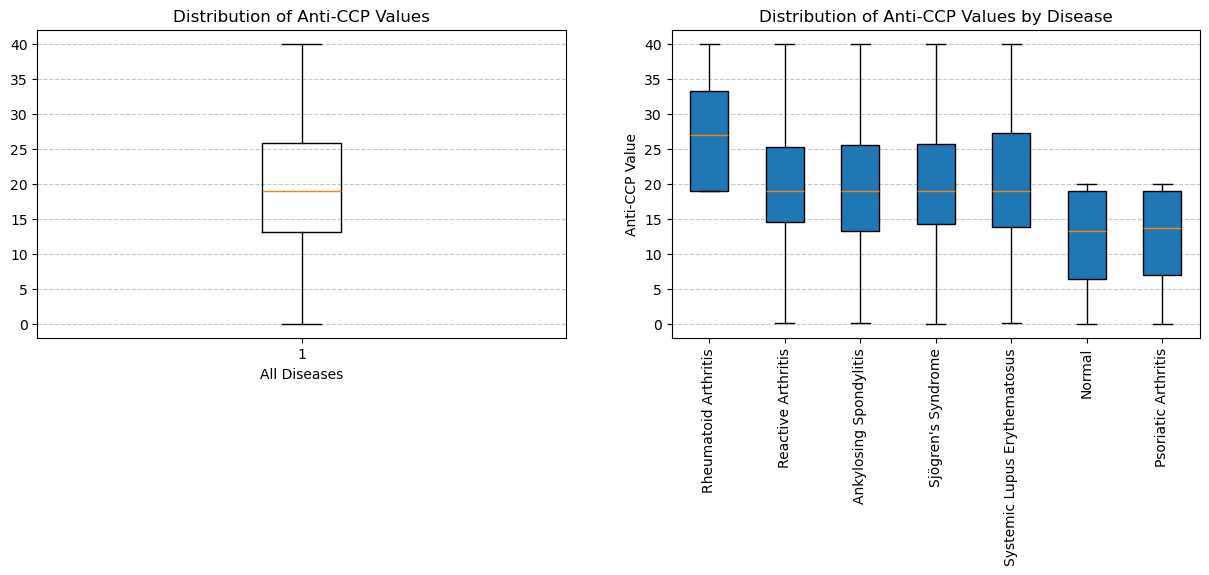

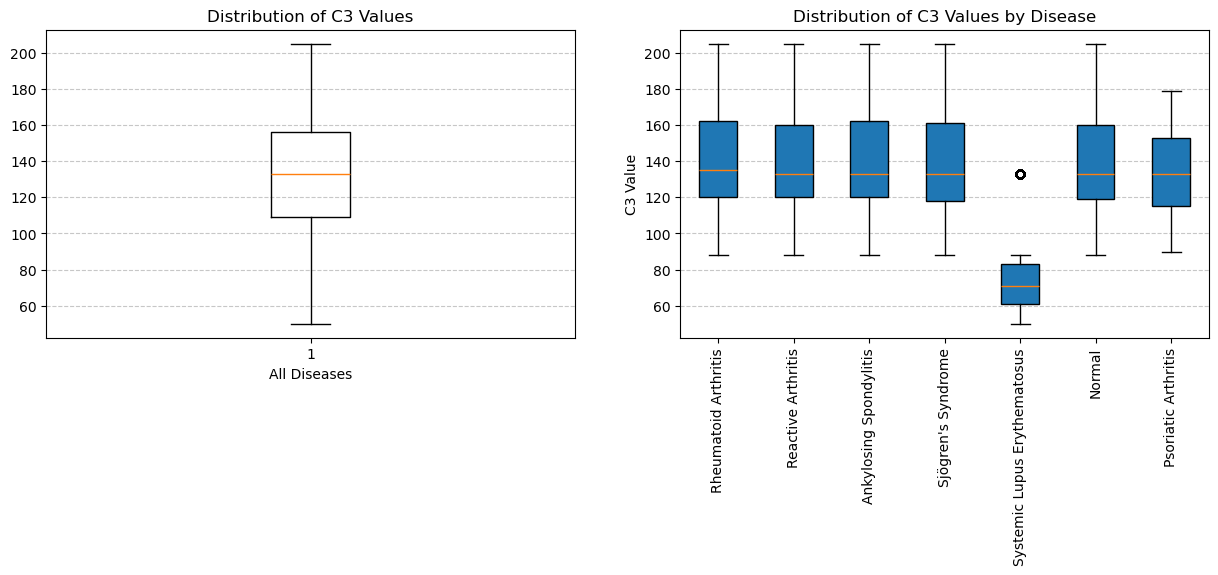

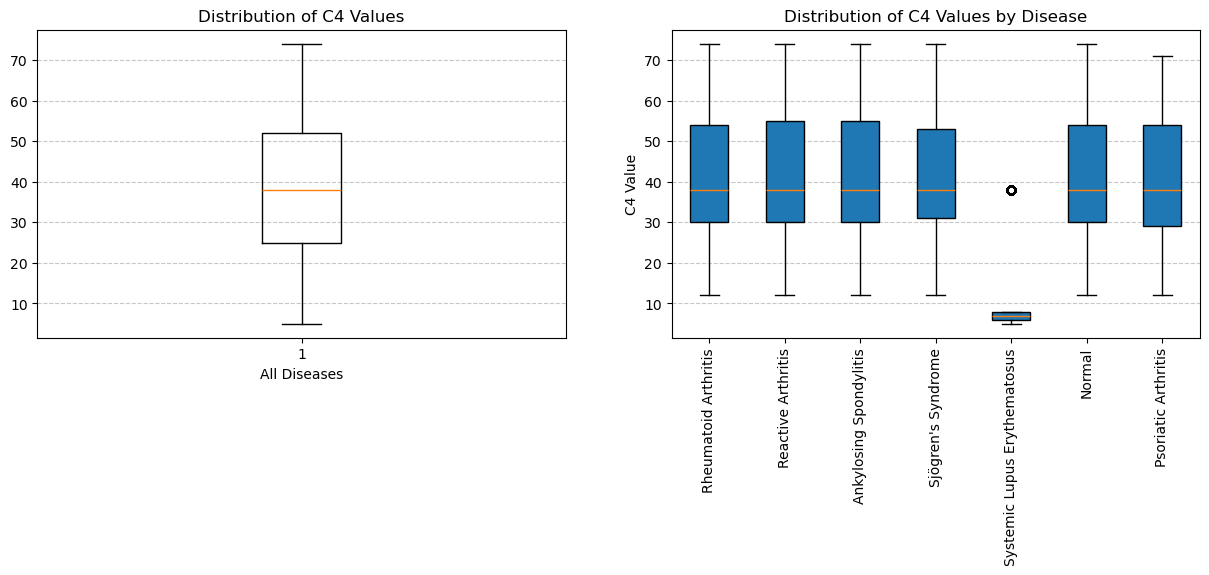

In [3]:
# Visualize box plots of numerical features

labels = df["Disease"].unique()
num_cols = ["ESR", "CRP", "RF", "Anti-CCP",  "C3", "C4"]
cat_cols = ["HLA-B27", "ANA", "Anti-Ro", "Anti-La", "Anti-dsDNA", "Anti-Sm"]

for col in ["Age"] + num_cols:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4), sharey=False)
    ax1.boxplot(df[col])
    ax1.set_title(f"Distribution of {col} Values")
    ax1.set_xlabel("All Diseases")
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    grouped_data = [df[col][df["Disease"] == category] for category in df["Disease"].unique()]
    ax2.boxplot(grouped_data, tick_labels=labels, patch_artist=True) 
    ax2.set_title(f"Distribution of {col} Values by Disease")
    ax2.set_ylabel(f"{col} Value")
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    ax2.tick_params('x', labelrotation=90)
    plt.show()

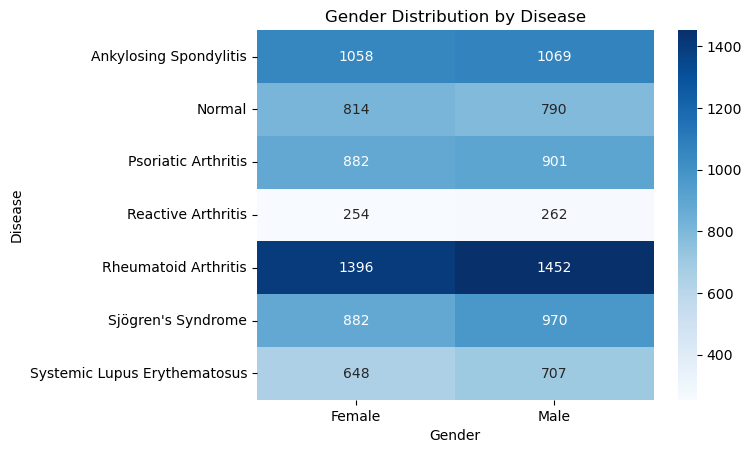

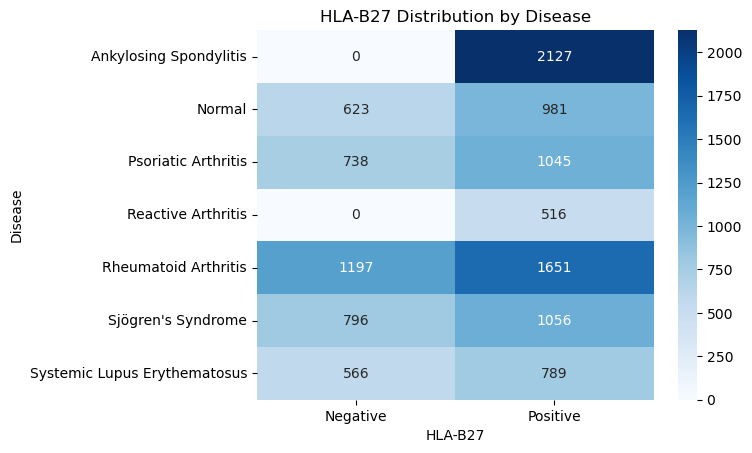

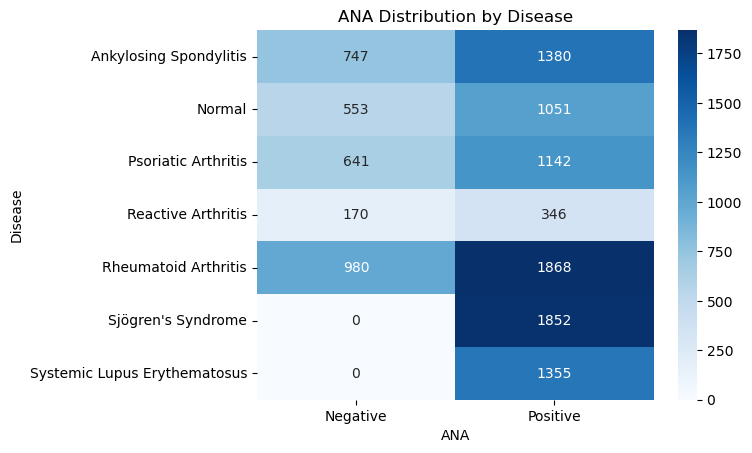

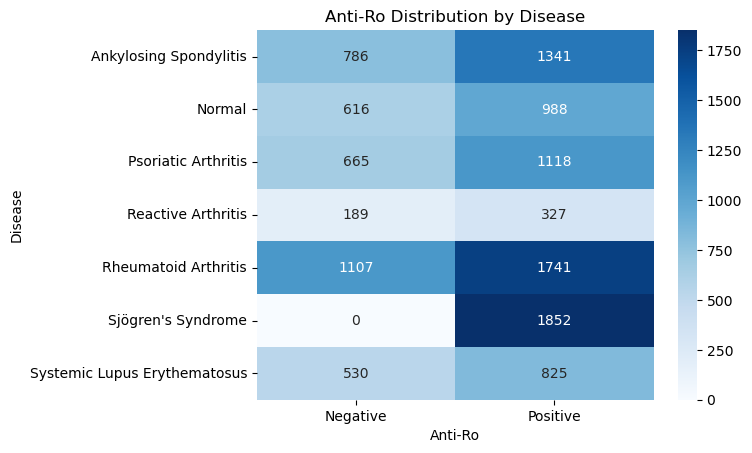

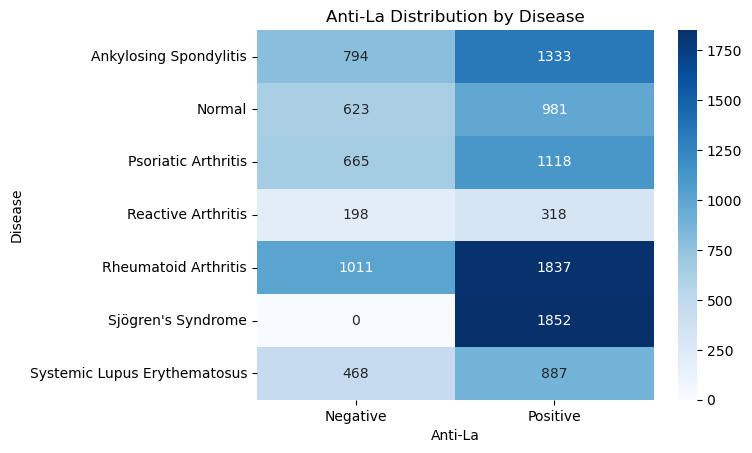

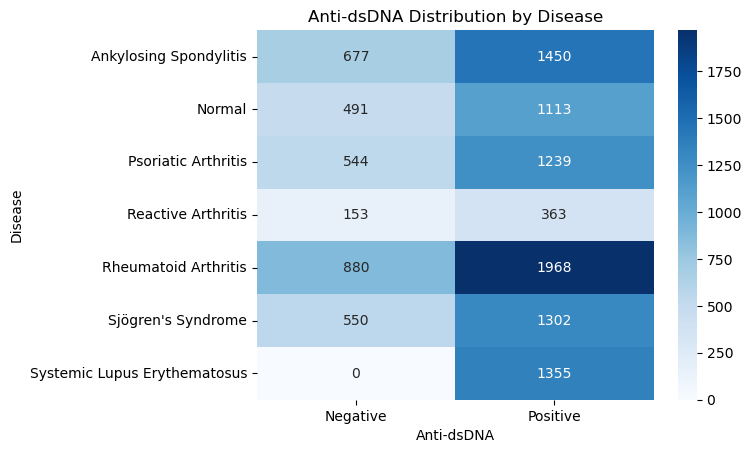

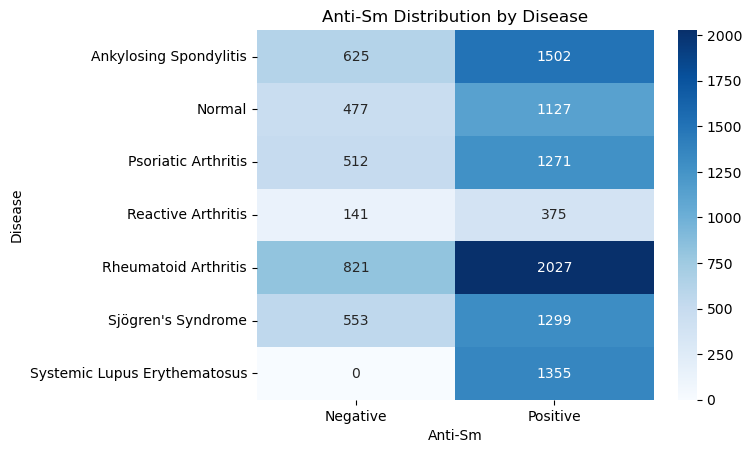

In [4]:
# Heatmaps of categorical features and disease

for col in ["Gender"] + cat_cols:
    ct = pd.crosstab(df["Disease"], df[col])
    sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{col} Distribution by Disease")
    plt.xlabel(f"{col}")
    plt.ylabel("Disease")
    plt.show()

In [5]:
# Use label encoding to encode target variable data
disease_encoder = LabelEncoder()
disease_encoder.fit(df["Disease"])

disease_map = dict(zip(disease_encoder.classes_, range(len(disease_encoder.classes_))))
df["Disease"] = disease_encoder.transform(df["Disease"])

print(disease_map)

# Use get_dummies to one-hot encode categorical predictor variable data
df = pd.get_dummies(df, columns=["Gender", "HLA-B27", "ANA", "Anti-Ro", "Anti-La", "Anti-dsDNA", "Anti-Sm"], dtype=int)

df = df.round(1)
df

{'Ankylosing Spondylitis': 0, 'Normal': 1, 'Psoriatic Arthritis': 2, 'Reactive Arthritis': 3, 'Rheumatoid Arthritis': 4, "Sjögren's Syndrome": 5, 'Systemic Lupus Erythematosus': 6}


,Age,Disease,ESR,CRP,RF,Anti-CCP,C3,C4,ESR_missing,CRP_missing,...,ANA_Negative,ANA_Positive,Anti-Ro_Negative,Anti-Ro_Positive,Anti-La_Negative,Anti-La_Positive,Anti-dsDNA_Negative,Anti-dsDNA_Positive,Anti-Sm_Negative,Anti-Sm_Positive
0,70,4,39.0,18.6,34.2,29.9,133.0,27.0,0.0,0.0,...,1,0,0,1,1,0,0,1,0,1
1,39,4,26.0,21.7,35.5,28.9,100.0,66.0,0.0,0.0,...,0,1,0,1,0,1,0,1,0,1
2,36,4,41.0,15.6,21.3,21.3,158.0,12.0,0.0,0.0,...,1,0,0,1,0,1,1,0,0,1
3,35,4,43.0,23.4,26.0,39.0,119.0,41.0,0.0,0.0,...,0,1,0,1,0,1,0,1,0,1
4,37,4,30.0,15.6,38.1,30.8,144.0,49.0,0.0,1.0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,32,2,36.0,17.0,14.5,16.1,133.0,32.0,0.0,0.0,...,0,1,1,0,0,1,0,1,0,1
12081,36,2,43.0,15.6,17.7,13.5,133.0,41.0,0.0,1.0,...,1,0,1,0,0,1,0,1,1,0
12082,20,2,31.0,28.8,4.8,5.8,133.0,38.0,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
12083,33,2,36.0,15.6,19.2,9.5,96.0,52.0,0.0,1.0,...,0,1,0,1,0,1,0,1,0,1


In [6]:
# Save csv file of final cleaned and encoded dataset

df.to_csv('cleaned_encoded_dataset.csv', index=False)
print("Cleaned and encoded dataset saved to CSV")

Cleaned and encoded dataset saved to CSV


In [20]:
# Split data into training, validation, and testing datasets

X = df.drop(["Disease"], axis=1)
y = df["Disease"]

# 1st split - 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2)
# 2nd split - 60% train, 20% validate
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.25)

# Save training, validation, and testing datasets to csv
train_df = pd.concat([X_train, y_train], axis = 1)
val_df = pd.concat([X_val, y_val], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)

train_df.to_csv('training_data.csv', index=False)
val_df.to_csv('validation_data.csv', index=False)
test_df.to_csv('testing_data.csv', index=False)
print("Train, validation, and test data sets saved to CSV")

# Examine distribution of outcome variable in training, validation, and testing data sets
print(f"Train: {train_df["Disease"].value_counts()}")
print(f"Validate: {val_df["Disease"].value_counts()}")
print(f"Test: {test_df["Disease"].value_counts()}")

Train, validation, and test data sets saved to CSV
Train: Disease
4    1747
0    1274
5    1075
2    1060
1     963
6     829
3     303
Name: count, dtype: int64
Validate: Disease
4    522
0    440
2    380
5    373
1    340
6    250
3    112
Name: count, dtype: int64
Test: Disease
4    579
0    413
5    404
2    343
1    301
6    276
3    101
Name: count, dtype: int64


Default Model Accuracy: 83.33%
Default Model ROC-AUC score: 98.35%
Default Model Classification Report
                              precision    recall  f1-score   support

      Ankylosing Spondylitis       0.67      0.69      0.68       440
                      Normal       0.96      0.76      0.85       340
         Psoriatic Arthritis       0.88      0.85      0.87       380
          Reactive Arthritis       0.86      0.53      0.65       112
        Rheumatoid Arthritis       0.81      0.89      0.85       522
          Sjögren's Syndrome       0.82      0.97      0.89       373
Systemic Lupus Erythematosus       1.00      0.98      0.99       250

                    accuracy                           0.83      2417
                   macro avg       0.86      0.81      0.82      2417
                weighted avg       0.84      0.83      0.83      2417



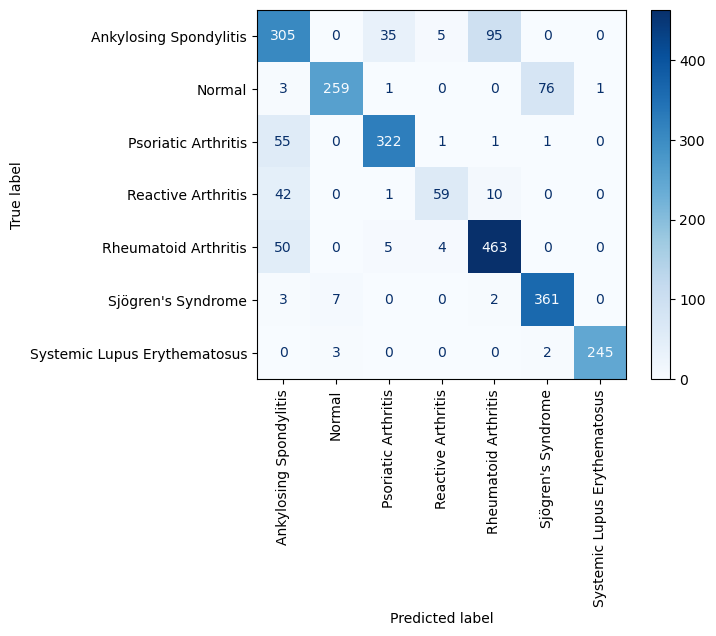

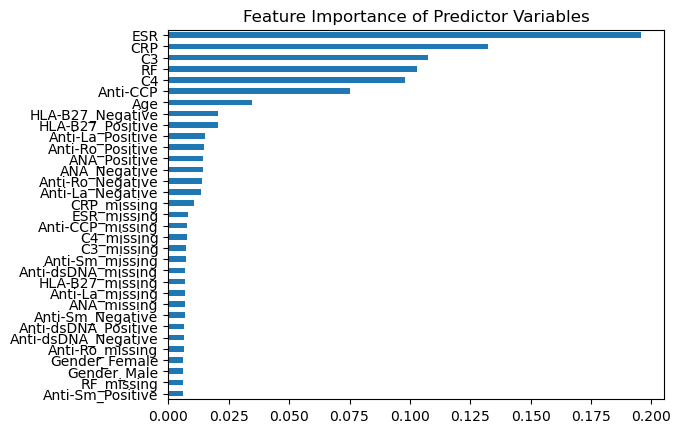

In [21]:
# Initial RandomForestClassifier model (with default parameters)

rfc_model = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=1)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_val)
y_pred_proba = rfc_model.predict_proba(X_val)

# Evaluate default model
# accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Default Model Accuracy: {accuracy * 100:.2f}%")

# ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class="ovr")
print(f"Default Model ROC-AUC score: {roc_auc * 100:.2f}%")

# classification report
report = classification_report(y_val, y_pred, target_names=disease_encoder.classes_)
print(f"Default Model Classification Report")
print(report)

# confusion matrix
matrix = confusion_matrix(y_val, y_pred, labels=rfc_model.classes_)
matrix_vis = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=disease_encoder.inverse_transform(rfc_model.classes_))
matrix_vis.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

# display feature importance
feature_imp = pd.Series(rfc_model.feature_importances_, index=X_train.columns)
sorted_feature_imp = feature_imp.sort_values()
sorted_feature_imp.plot(kind="barh")
plt.title("Feature Importance of Predictor Variables")
plt.show()

In [22]:
# Hyperparameter Tuning - Random Search

# View default model parameters
print("Default model parameters")
print(rfc_model.get_params())

# Generate param grid for tuning parameters
param_grid = {
    "n_estimators": [50, 100, 200, 400],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 5, 10, 20],
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"] 
}

# Create Random Search for tuning
random_rfc = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=50,
    scoring="f1_macro",
    n_jobs=2,
    cv=5,
    refit=True,
    return_train_score=True
)

random_rfc.fit(X_train, y_train)
best = random_rfc.best_estimator_

# Extract best hyperparameters from Random Search results
print("Best estimators from Random Search Results")
print(f"Best n_estimators: {best.n_estimators}")
print(f"Best max_features: {best.max_features}")
print(f"Best max_depth: {best.max_depth}")
print(f"Best min_samples_leaf: {best.min_samples_leaf}")
print(f"Best criterion: {best.criterion}")
print(f"Best class weight: {best.class_weight}")

Default model parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best estimators from Random Search Results
Best n_estimators: 400
Best max_features: log2
Best max_depth: 20
Best min_samples_leaf: 1
Best criterion: entropy
Best class weight: balanced


Tuned Model Accuracy: 83.78%
Tuned Model ROC-AUC score: 98.42%
Tuned Model Classification Report
                              precision    recall  f1-score   support

      Ankylosing Spondylitis       0.69      0.61      0.65       413
                      Normal       0.94      0.74      0.83       301
         Psoriatic Arthritis       0.86      0.89      0.88       343
          Reactive Arthritis       0.92      0.54      0.68       101
        Rheumatoid Arthritis       0.80      0.93      0.86       579
          Sjögren's Syndrome       0.83      0.96      0.89       404
Systemic Lupus Erythematosus       1.00      0.97      0.98       276

                    accuracy                           0.84      2417
                   macro avg       0.86      0.80      0.82      2417
                weighted avg       0.84      0.84      0.83      2417



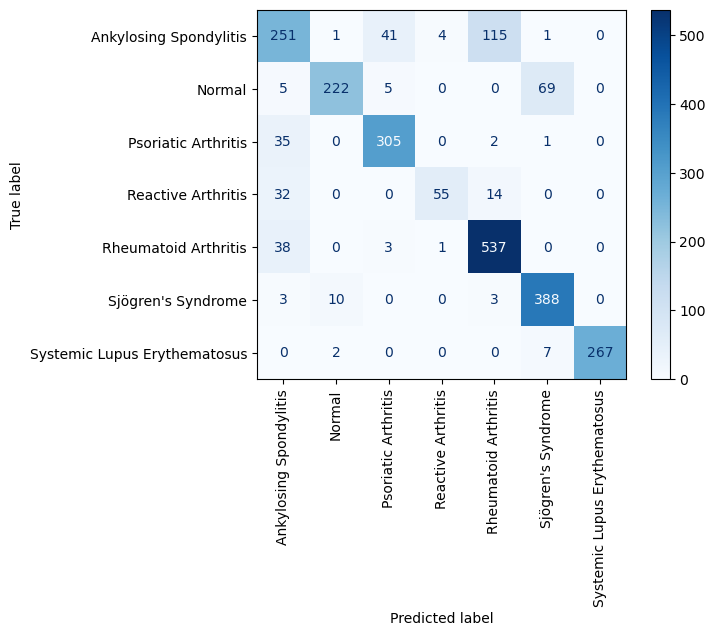

In [28]:
# Refit model with best hyperparameters

rfc_tuned_model = RandomForestClassifier(
    random_state=42,
    class_weight=best.class_weight,
    n_jobs=1,
    n_estimators=best.n_estimators,
    max_features=best.max_features,
    max_depth=best.max_depth,
    min_samples_leaf=best.min_samples_leaf,
    criterion=best.criterion
)
rfc_tuned_model.fit(X_train, y_train)
y_pred = rfc_tuned_model.predict(X_test)

y_pred_proba = rfc_tuned_model.predict_proba(X_test)

# Evaluate tuned model
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy * 100:.2f}%")

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print(f"Tuned Model ROC-AUC score: {roc_auc * 100:.2f}%")

# classification report (precision, recall, F1)
report = classification_report(y_test, y_pred, target_names=disease_encoder.classes_)
print(f"Tuned Model Classification Report")
print(report)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=rfc_tuned_model.classes_)
matrix_vis = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=disease_encoder.inverse_transform(rfc_model.classes_))
matrix_vis.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [29]:
# Hypothesis testing - Permutation test

score, permutation_scores, pvalue = permutation_test_score(
    estimator=rfc_tuned_model, 
    X=X_test, 
    y=y_test,
    scoring="accuracy",   
    n_permutations=100,          
    n_jobs=1,                   
    random_state=42
)

print(f"Observed accuracy: {score}")
print(f"Permutation p-value: {pvalue}")

Observed accuracy: 0.828726280307308
Permutation p-value: 0.009900990099009901
